# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [1]:
!python -m pip install --upgrade pip
!pip install --upgrade nbformat
!pip install --upgrade IPython

     ---------------------------------------- 2.1/2.1 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
  Using cached nbformat-5.8.0-py3-none-any.whl (77 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.5.0
    Uninstalling nbformat-5.5.0:
      Successfully uninstalled nbformat-5.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.8.0 which is incompatible.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.7 which is incompatible.


     ------------------------------------- 797.7/797.7 kB 10.1 MB/s eta 0:00:00
  Using cached prompt_toolkit-3.0.38-py3-none-any.whl (385 kB)
  Using cached stack_data-0.6.2-py3-none-any.whl (24 kB)
  Using cached executing-1.2.0-py2.py3-none-any.whl (24 kB)
  Using cached asttokens-2.2.1-py2.py3-none-any.whl (26 kB)
  Using cached pure_eval-0.2.2-py3-none-any.whl (11 kB)
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 3.0.20
    Uninstalling prompt-toolkit-3.0.20:
      Successfully uninstalled prompt-toolkit-3.0.20
  Attempting uninstall: IPython
    Found existing installation: ipython 7.31.1
    Uninstalling ipython-7.31.1:
      Successfully uninstalled ipython-7.31.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
spyder 5.2.2 requires ipython<8.0.0,>=7.6.0, but you have ipython 8.13.2 which is incompatible.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.7 which is incompatible.
spyder-kernels 2.2.1 requires ipython<8,>=7.6.0; python_version >= "3", but you have ipython 8.13.2 which is incompatible.


In [2]:
!python --version
!ls

Python 3.9.13


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# If this cell does not work try running `pip install nbformat`

import io
import nbformat

nb = nbformat.read("Lab1-2021.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 368


## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('data/train_data.csv')
# Change index to Id
df.set_index('Id', inplace=True)
df.head()

,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,label
Id,,,,,,,,,,,,,,
1,GB,mccredit,546097.0,4500.0,GBP,GB,Ecommerce,True,1,UKAccount,email132571,ip123779,card250169,0
2,GB,mcdebit,557349.0,3395.0,GBP,GB,Ecommerce,True,1,UKAccount,email312302,ip298387,card14235,0
3,GB,mccredit,542011.0,3895.0,GBP,GB,Ecommerce,True,1,UKAccount,email255027,ip260053,card31944,0
4,GB,visadebit,465943.0,15345.0,GBP,GB,ContAuth,False,0,UKAccount,email283167,ip54851,card120871,0
6,GB,visadebit,475127.0,5095.0,GBP,GB,Ecommerce,True,1,UKAccount,email325263,ip203929,card208017,0


<AxesSubplot:xlabel='currencycode', ylabel='shoppercountrycode'>

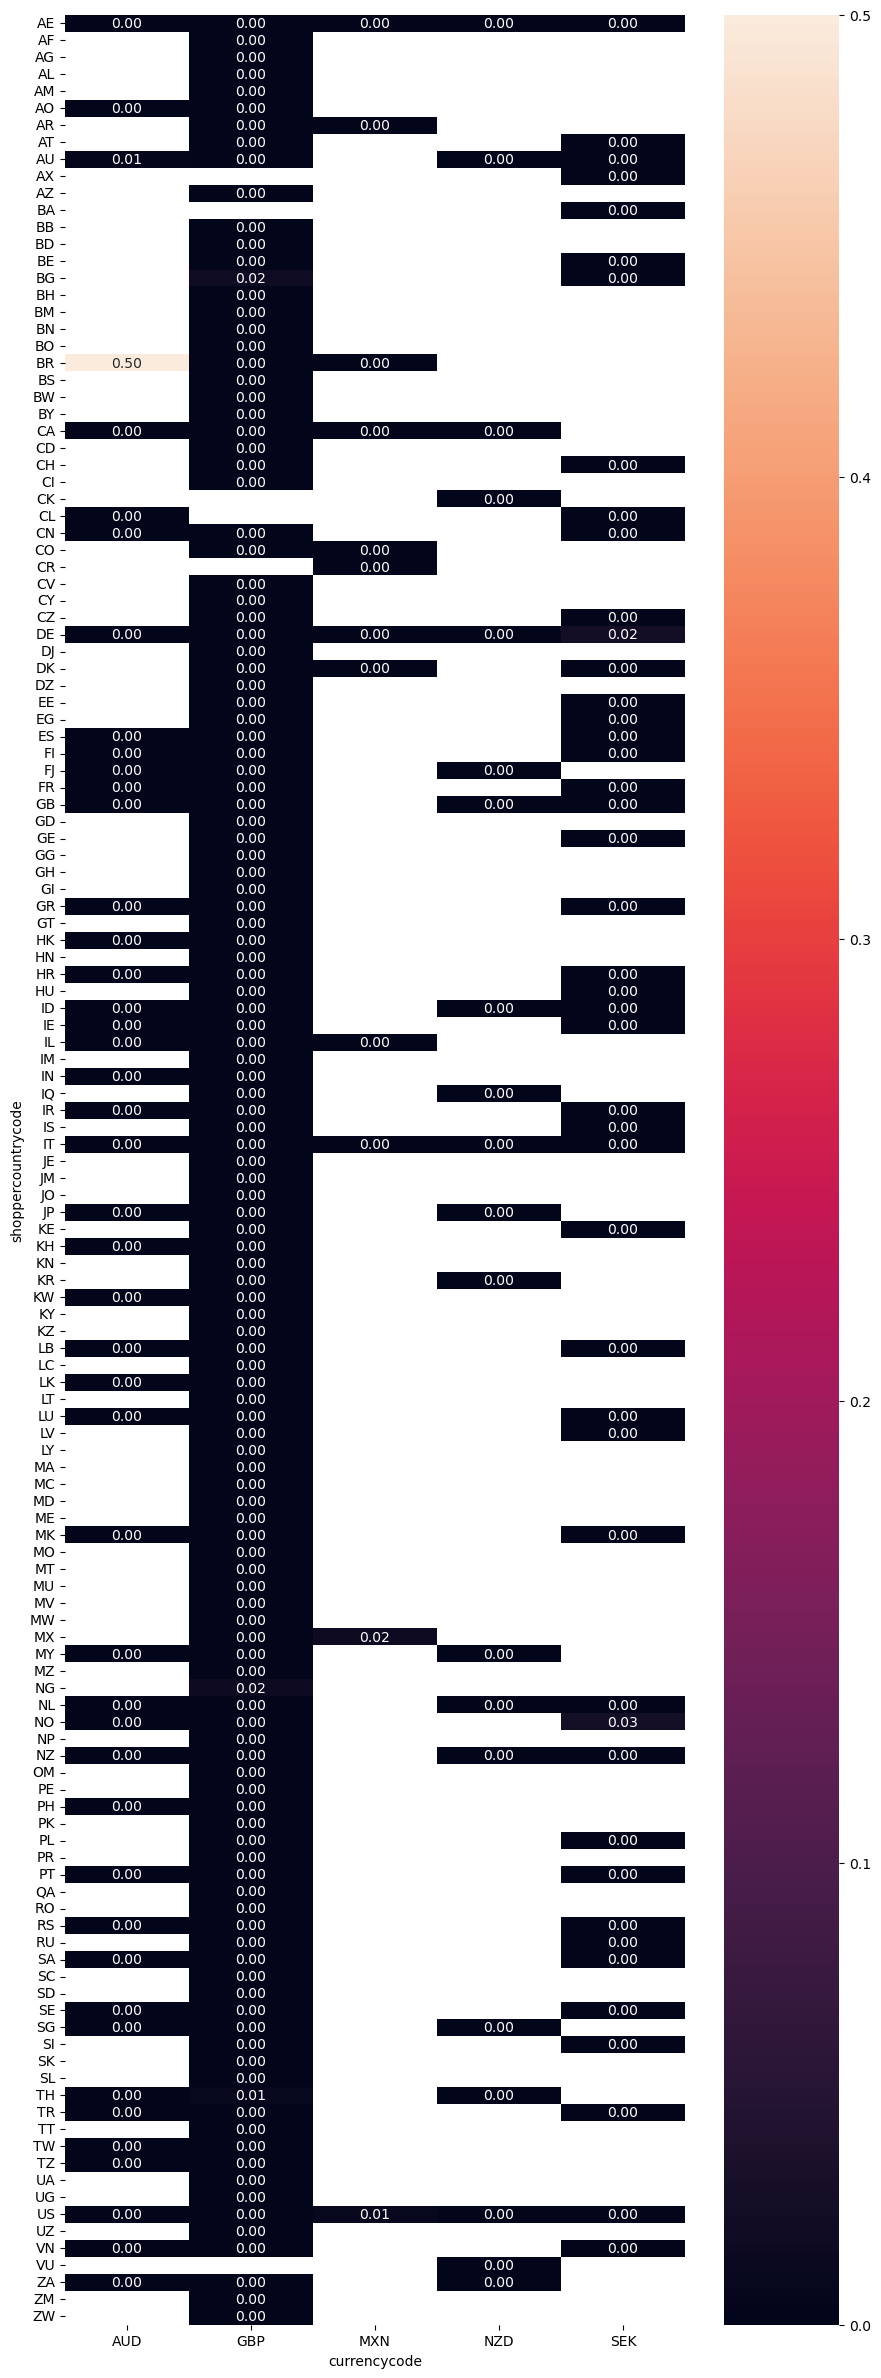

In [25]:
# Pivot the table to get the mean of the label for each currency type and shopper country code
pivoted = df.pivot_table(values='label', index='shoppercountrycode', columns='currencycode', aggfunc='mean')
# Make a seaborne heatmap that is long enough to leave room for the labels
plt.figure(figsize=(10, 30))
sns.heatmap(pivoted, annot=True, fmt=".2f")


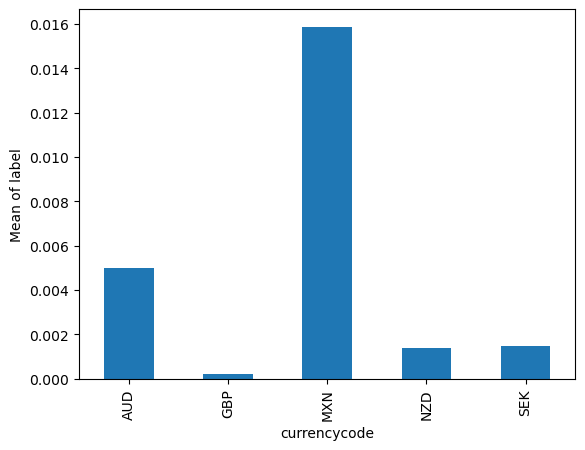

In [26]:
# Group by currency type and plot the mean of the label
df.groupby('currencycode')['label'].mean().plot(kind='bar')
plt.ylabel('Mean of label')
plt.show()

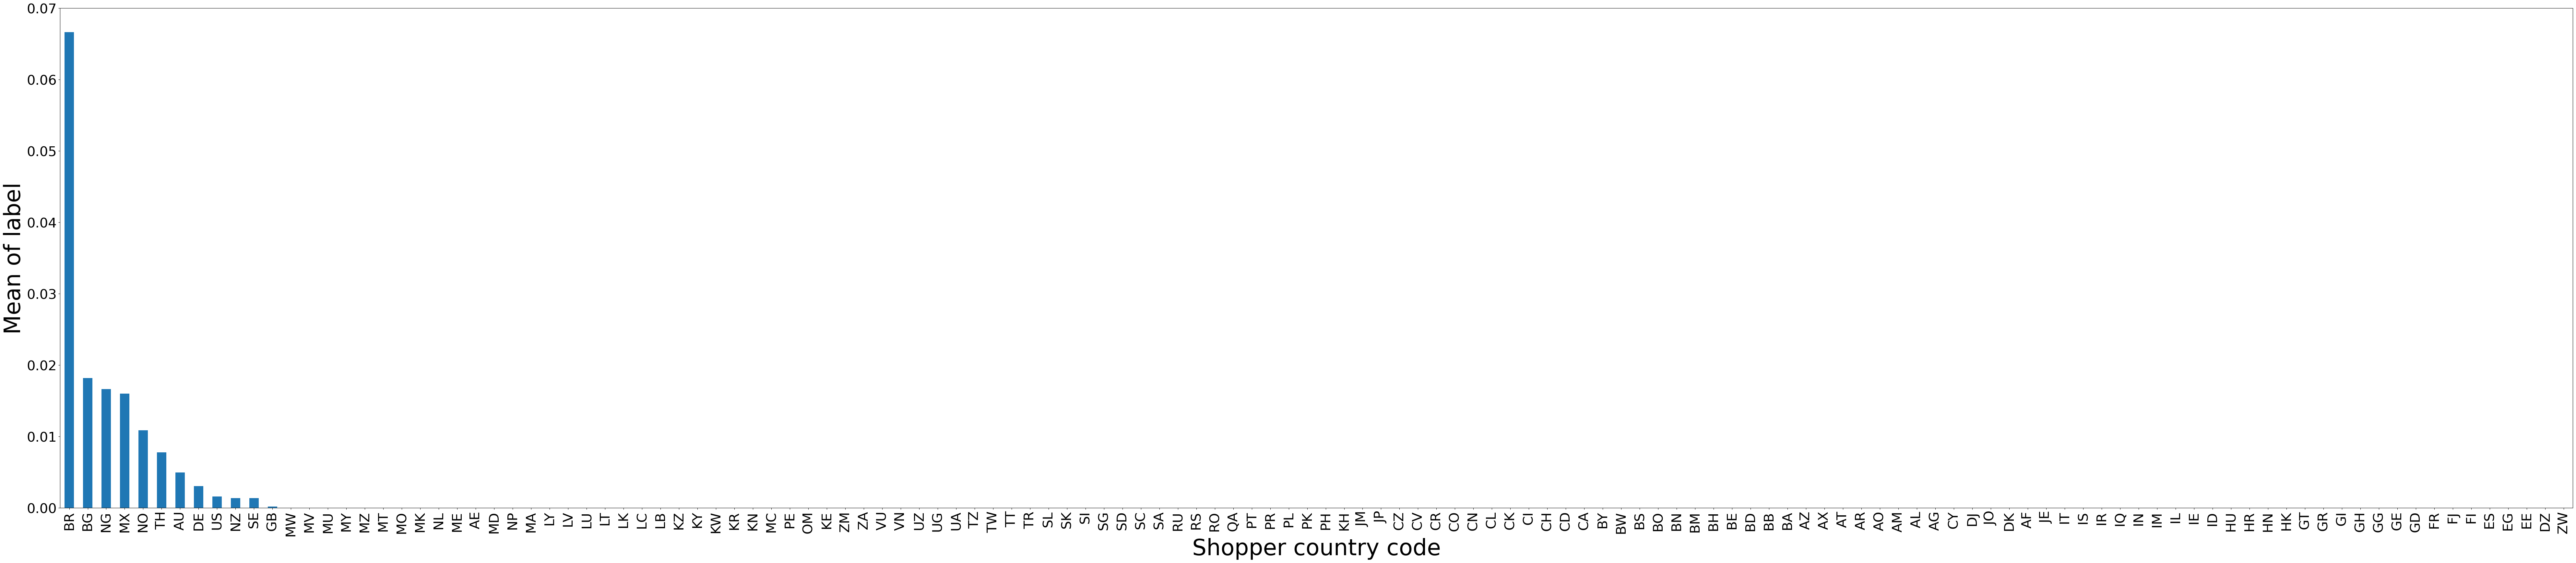

In [46]:
# Group by shopper country code and plot the mean of the label
plt.figure(figsize=(100, 20))
df.groupby('shoppercountrycode')['label'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Mean of label', fontsize=50)
plt.xlabel('Shopper country code', fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

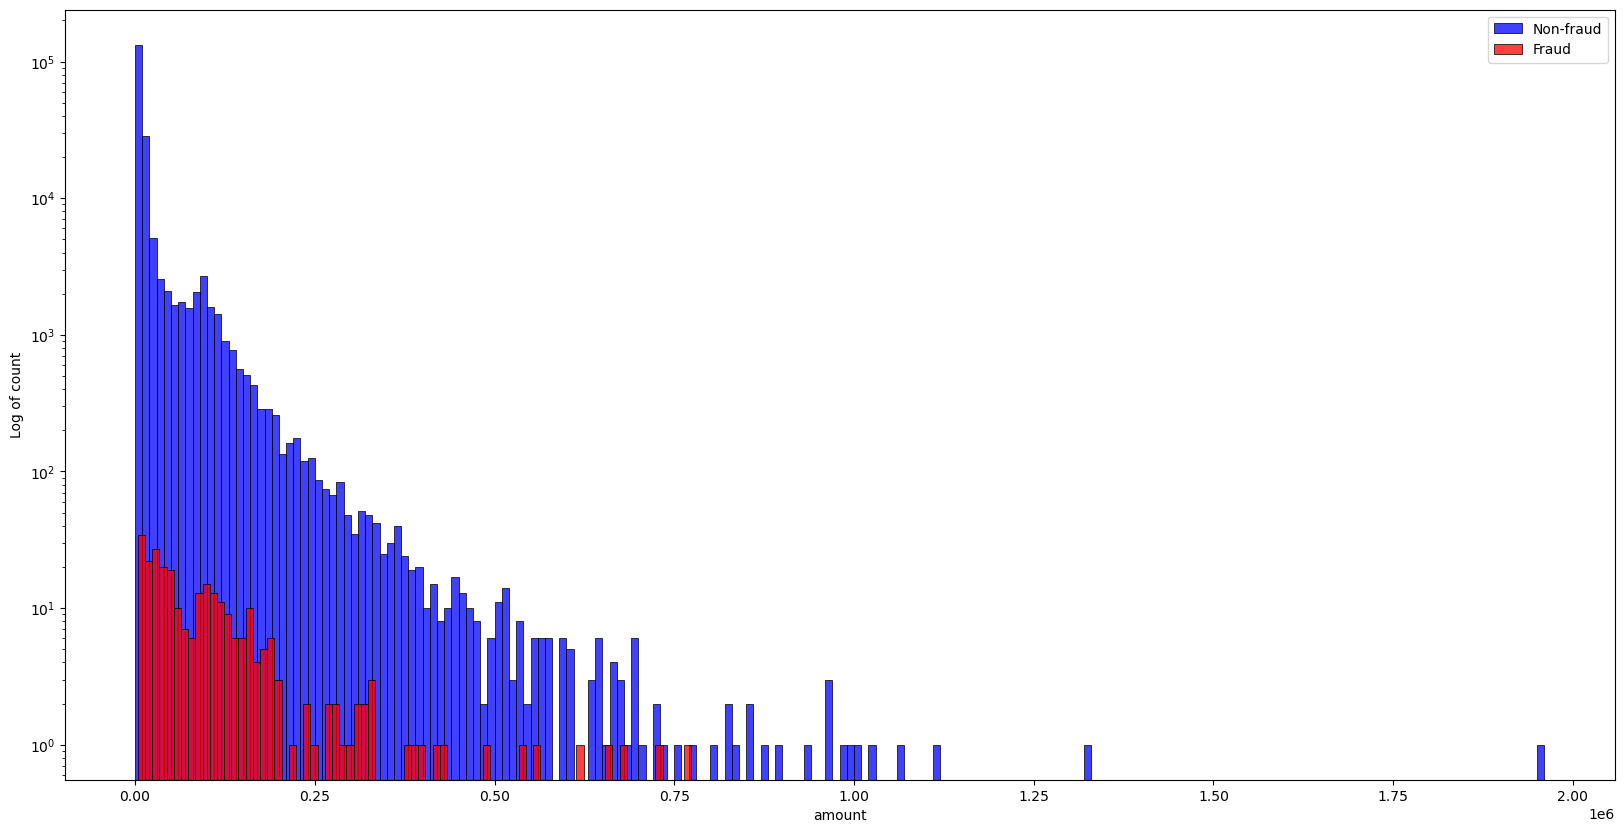

In [79]:
# Plot the distribution of the amount depending on the label
df_amount_fraud = df[df['label'] == 1]['amount']
df_amount_non_fraud = df[df['label'] == 0]['amount']
plt.figure(figsize=(20, 10))
sns.histplot(df_amount_non_fraud, color='blue', label='Non-fraud', log_scale=(False, True), binwidth=10000)
sns.histplot(df_amount_fraud, color='red', label='Fraud', log_scale=(False, True), binwidth=10000)
plt.ylabel("Log of count")
plt.legend()
plt.show()

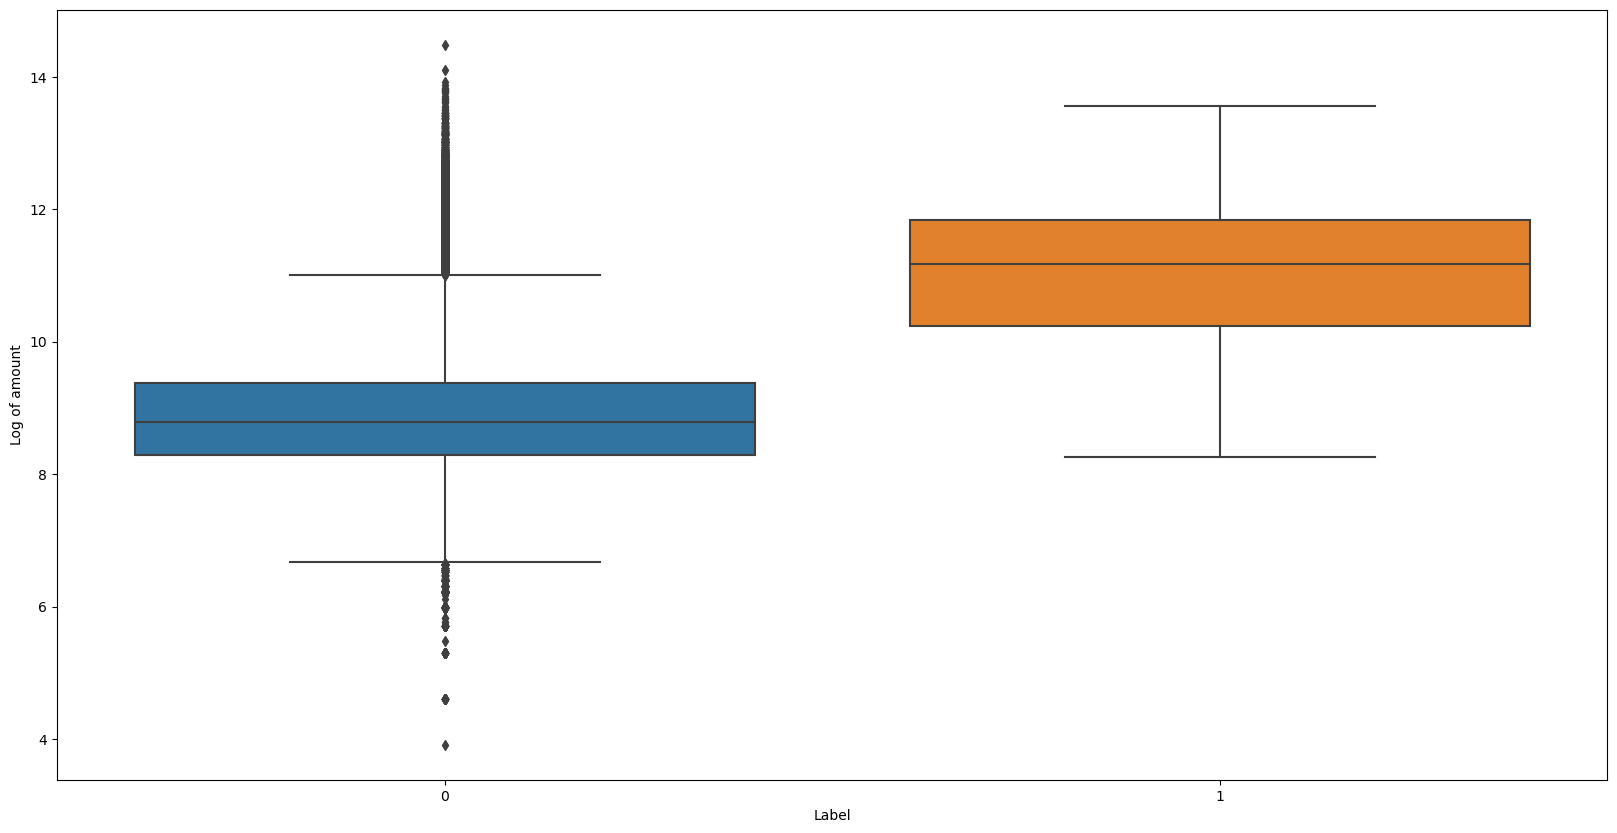

In [83]:
# Create a boxplot of the log of amount depending on the label
plt.figure(figsize=(20, 10))
sns.boxplot(x='label', y=np.log(df['amount']), data=df)
plt.ylabel("Log of amount")
plt.xlabel("Label")
plt.show()

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below